In [15]:
import openai
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import os
from dotenv import load_dotenv

In [16]:
# Load environment variables
load_dotenv()

# Fetch API key securely
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")


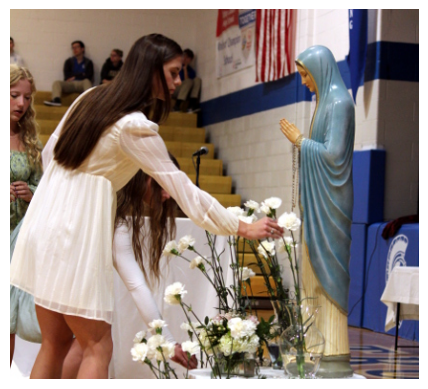


Identified Sacred Symbols:

In the image you described, there are a few sacred or religious symbols present:

1. **Statue of the Virgin Mary**:
   - **Description**: The figure of the Virgin Mary is typically depicted wearing a flowing robe and a veil, often with her hands in a prayerful position.
   - **Cultural Significance**: In Christianity, especially within the Catholic tradition, the Virgin Mary is revered as the mother of Jesus Christ. She symbolizes purity, motherhood, and compassion. Many believers pray to her for intercession.

2. **Flowers**:
   - **Description**: The presence of flowers, particularly white flowers, is a common religious symbol.
   - **Cultural Significance**: Flowers often represent purity, beauty, and the fragility of life. In Christian practices, they are typically used in religious ceremonies, symbolizing offerings and devotion.

3. **Setting/Background**:
   - **Description**: The setting suggests a place of worship or a ceremonial event, indicated by

In [17]:
def analyze_image(image_url):
    """Analyze an image using OpenAI's gpt-4o-mini model to detect sacred symbols."""
    
    # Define the prompt for object detection of sacred symbols
    prompt = ("Identify and list any sacred or religious symbols in this image. "
              "Describe them and mention their cultural or religious significance.")

    response = openai.ChatCompletion.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "system",
                "content": "You are an expert in visual analysis and object recognition."
            },
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": prompt},
                    {"type": "image_url", "image_url": {"url": image_url}}
                ]
            }
        ],
        api_key=OPENAI_API_KEY
    )

    return response["choices"][0]["message"]["content"]

def display_image(image_url):
    """Display an image from a URL using matplotlib."""
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    # Provide the URL to your image
    image_url = "https://www.bishopchatard.org/wp-content/uploads/heros/Hero-FP-MayCrowning2022.jpg"  

    # Analyze the image for sacred symbols
    result = analyze_image(image_url)

    # Display the image
    display_image(image_url)

    # Print results
    print("\nIdentified Sacred Symbols:\n")
    print(result)
